# Simulate multiple walks
A single random walk is one thing, but that doesn't tell you if you have a good chance at winning the bet.
To get an idea about how big your chances are of reaching 60 steps, you can repeatedly simulate the random walk and collect the results.

In [1]:
import numpy as np
np.random.seed(123)

In [2]:
import matplotlib.pyplot as plt

In [3]:
all_walk=[] #list of all the random walks

for j in range(500): #repeating random walk for 500 times
    
    step = 0 #step starts from 0 at every random walk
    random_walk=[0] #list of random walk starts from step 0 and reache certain step after 100 dice rolls
    
    for i in range(100):#for each random walk roll dice 100 times to reach a certain step
        
        dice = np.random.randint(1,7) #roll dice to get random dice eye (1,2,3,4,5,6)
        
        if dice<=2: 
            step = max(0, step-1) #if dice<=2 reduce step by 1, but if step=0 remain step at 0
        elif dice<=5:
            step = step+1 #if dice>=3 and dice<=5, increase step by 1
        else:
            step = step + np.random.randint(1,7) #if dice=6 then roll again and add the generated dice eye to the step
            
        if (np.random.rand() < 0.001): #if player is clumsiness then they go back to step 0 
            step = 0
        
        random_walk.append(step) 
    all_walk.append(random_walk) 
print(all_walk)
        
    

[[0, 3, 2, 3, 2, 1, 0, 1, 2, 3, 4, 5, 4, 3, 4, 3, 4, 5, 6, 7, 8, 9, 10, 11, 15, 16, 15, 17, 16, 17, 18, 17, 18, 19, 21, 22, 23, 22, 23, 24, 23, 24, 25, 26, 30, 32, 34, 39, 40, 41, 40, 41, 42, 41, 40, 41, 47, 46, 45, 46, 47, 52, 51, 50, 49, 51, 52, 54, 55, 54, 55, 56, 57, 58, 57, 58, 62, 61, 62, 61, 60, 59, 58, 59, 60, 61, 62, 64, 65, 64, 63, 64, 65, 66, 68, 69, 68, 69, 70, 69, 70], [0, 5, 4, 3, 4, 5, 6, 7, 8, 9, 8, 14, 13, 14, 18, 22, 24, 26, 29, 30, 29, 30, 31, 32, 31, 32, 38, 37, 38, 39, 41, 40, 41, 47, 48, 49, 50, 49, 48, 49, 50, 49, 53, 52, 53, 54, 55, 59, 60, 59, 61, 60, 59, 60, 59, 58, 59, 64, 63, 62, 66, 69, 70, 72, 73, 72, 71, 72, 73, 72, 71, 76, 77, 78, 77, 76, 77, 78, 84, 85, 86, 87, 88, 87, 86, 87, 88, 87, 86, 87, 88, 87, 88, 89, 90, 89, 90, 91, 90, 93, 94], [0, 0, 1, 2, 4, 3, 2, 3, 7, 8, 9, 12, 13, 14, 13, 12, 18, 19, 18, 17, 18, 19, 18, 19, 24, 25, 31, 37, 39, 40, 46, 45, 46, 45, 46, 48, 49, 48, 49, 53, 52, 51, 52, 53, 54, 53, 52, 53, 52, 51, 52, 51, 52, 53, 52, 53, 54, 55

In [4]:
np_aw = np.array(all_walk)
print(np_aw)

[[ 0  3  2 ... 70 69 70]
 [ 0  5  4 ... 90 93 94]
 [ 0  0  1 ... 80 81 82]
 ...
 [ 0  1  2 ... 93 92 91]
 [ 0  1  0 ... 59 58 57]
 [ 0  1  0 ... 60 61 65]]


In [5]:
#transpose np_aw 
np_aw_tp = np.transpose(np_aw)
print(np_aw_tp)

[[ 0  0  0 ...  0  0  0]
 [ 3  5  0 ...  1  1  1]
 [ 2  4  1 ...  2  0  0]
 ...
 [70 90 80 ... 93 59 60]
 [69 93 81 ... 92 58 61]
 [70 94 82 ... 91 57 65]]


In [6]:
ends = np_aw_tp[-1] 
print(ends) #This contains the endpoint of all 500 random walks

[ 70  94  82  66 107  49  72 116  65  78  87  47  81  75  56  70  77  88
  55  42  74  64  63  58  70  55  93  98  58  60  70  70  72  71  47  78
  78  79  71  83  71  56  63  94  49  72  63  74  61  61  79  91  46  66
  70  55   0  80  45  89  91  61  83  71  60  68  74  85  68  88  64  84
 114  61  65  78  63  61  90  96  83  77  80  71  87  73  60  85  84  76
 105  57  98  46  63 112  81  45 101  74  77  13  81  47  97  90  66  52
  63  54  91  26 101  81  64  95  83  99  75  75  61  97  57  94  76  82
  86  52 122 110  91  47  34  94 106  58  74  75  93  64  57  76 100  66
  98  94  60  72  55  85  66  69  59  78  81  87  75  58  80  97  75  67
  22   6  78  87  87  80  80 108  59  83  76  60  73  75   8 116  10 106
  78  76  53 103  42  49 101  80  73  66  93  92  63  89  59  50  57  72
  41  94  79  63  88 109  88  95  52  74  70  80  89  77  42  83  72  65
  87  80  59  67  65  70  86 104  69  76  76  13  39  64  57 102  66  71
  73   2  83  75  71  84  66  79  73  56  76  84  5

<function matplotlib.pyplot.show(close=None, block=None)>

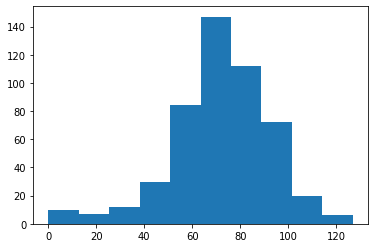

In [7]:
#ploting histogram of all the end points of 500 random walks
plt.hist(ends, bins=10)
plt.show

# The odds that you'll reach 60 steps high on the Empire State Building

In [8]:
odds = ends[ends>=60] 
print(odds) #This has all the end points greater than or equal to step 60

[ 70  94  82  66 107  72 116  65  78  87  81  75  70  77  88  74  64  63
  70  93  98  60  70  70  72  71  78  78  79  71  83  71  63  94  72  63
  74  61  61  79  91  66  70  80  89  91  61  83  71  60  68  74  85  68
  88  64  84 114  61  65  78  63  61  90  96  83  77  80  71  87  73  60
  85  84  76 105  98  63 112  81 101  74  77  81  97  90  66  63  91 101
  81  64  95  83  99  75  75  61  97  94  76  82  86 122 110  91  94 106
  74  75  93  64  76 100  66  98  94  60  72  85  66  69  78  81  87  75
  80  97  75  67  78  87  87  80  80 108  83  76  60  73  75 116 106  78
  76 103 101  80  73  66  93  92  63  89  72  94  79  63  88 109  88  95
  74  70  80  89  77  83  72  65  87  80  67  65  70  86 104  69  76  76
  64 102  66  71  73  83  75  71  84  66  79  73  76  84  73  99  69  83
  86  81  77 100  87  75  80  98  64  75  77  62  98  89  66  88 108  71
 116  87  63  88  77 107  67  67  71  78  64 108  93 100  65  97  74  70
  79  66  82  87  71  86  68  80  61  67  69  60 11

In [9]:
oddshape = odds.shape #counting the end points which are greater than 60
print(oddshape)

(392,)


In [10]:
reach_60 = oddshape[0]/500 *100
print("Odds to reach 60 steps high on the Empire State Building is "+str(reach_60)+"%")

Odds to reach 60 steps high on the Empire State Building is 78.4%
